In [1]:
from interaction_matrices import interactions
from decay_matrices import decay_class

from rho_X import rho
import Lambdas
from scipy.integrate import odeint
from scipy.interpolate import UnivariateSpline
from scipy.integrate import solve_ivp
from scipy.sparse import *
import time

In [2]:
import pickle
#with open('/home/kruteesh/Desktop/Solar_neutrinos/energyloss.pickle', 'rb') as f:
p_leptons = pickle.load(open('/home/kruteesh/Desktop/Solar_neutrinos/Energy_loss_1.pkl','rb'))
#And the rate matrices:


In [3]:
#  Imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from jupyterthemes import jtplot



In [4]:
# MCEq Imports
from MCEq.particlemanager import ParticleManager
import MCEq.core 
from MCEq.core import MCEqRun
from MCEq.data import Decays
import mceq_config as config
#import primary model choices
import crflux.models as pm


In [5]:
config.A_target=1.2
config.muon_helicity_dependence=True

In [6]:
# Silincing mceq, set to 1 or higher for output
config.debug_level = 0

# Launcing mceq
mceq_run = MCEqRun(
    #provide the string of the interaction model
    interaction_model='SIBYLL23CPP',
    #primary cosmic ray flux model
    primary_model = (pm.HillasGaisser2012, "H3a"),
    # Zenith angle in degrees. 0=vertical, 90=horizontal
    theta_deg=0.0
    
)

In [7]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


In [8]:
def rho_fun_data(rr,rh):
    
    return UnivariateSpline(rr,rh[0:len(ser)],k=1,s=0,ext=0)

In [9]:
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)

In [10]:
#list of particles in concern
list_particles=[mceq_run.pman[2212],     #p+           (0)
                mceq_run.pman[-2212],     #pbar-        (1)
                mceq_run.pman[2112],     #n            (2)
                mceq_run.pman[-2112],    #nbar         (3)
                mceq_run.pman[211],      #pi+          (4)
                mceq_run.pman[-211],     #pi-          (5)
                mceq_run.pman[310],      #K_S0         (6) 
                mceq_run.pman[130],      #K_L0         (7)
                mceq_run.pman[321],      #K+           (8)
                mceq_run.pman[-321],     #K-           (9)
                mceq_run.pman[111],      #pi0          (10)
                mceq_run.pman[-3122],    #Lambda_r0    (11)
                mceq_run.pman[3122],     #Lambda0      (12)
                mceq_run.pman[13],   #mu-          (13)
                mceq_run.pman[-13],  #mu+          (14)
                mceq_run.pman[-11],      #e+           (15)   
                mceq_run.pman[11],       #e-           (16)
                mceq_run.pman[12],       #numu         (23)
                mceq_run.pman[-12],      #numubar      (24)
                mceq_run.pman[14],       #nue          (21)
                mceq_run.pman[-14],      #nuebar       (22)
                mceq_run.pman[22]#gamma        (25)
               ]

In [11]:
"""""
For indices of the particles in phi 
"""""
j=0
ind={}
for i in list_particles:
    ind[i.name,'up']=0+j
    ind[i.name,'low']=121+j
    j=j+121

In [12]:
Name=[r"$P^{+}$",
      r"$\overline{P}^{-}$",
      r"$n^0$",
      r"$\overline{n}$",
      r"$\pi^{+}$",
      r"$\pi^{-}$",
      r"$K_{S}^0$"
      ,r"$K_{L}^0$",
      r"$K^{+}$",
      r"$K^{-}$",
      r"$\pi^{0}$",
      r"$\overline{\Lambda}^{0}$",
      r'$\Lambda^{0}$',
      r"$\mu^{-}$",
      r"$\mu^{+}$",
      r"$e^{+}$",
      r"$e^{-}$",
      r"$\nu_{e}$",
      r"$\overline{\nu}_{e}$",
      r"$\nu_{\mu}$"
      ,r"$\overline{\nu}_{\mu}$" ,
      r'$\gamma$'
    
]

In [13]:
#list of pdg ids 
list_particles_pdg_id=[]
for i in range(0,len(list_particles)):
    list_particles_pdg_id.append(list_particles[i].pdg_id[0])

In [14]:
"""""
    gives back division of matrices with 0 at places where infinity arises

    Parameters:
    ------------------------
    a matrix ,   b  matrix

    Returns:
    ------------------------
    c matrix 
    """""
def zero_division(a, b):
    c = np.divide(a, b)
    c[c == np.infty] = 0.
    return c

In [15]:
C=interactions(list_particles,list_particles_pdg_id).store_data()

/home/kruteesh/Desktop/Solar_neutrinos/diffsec/diffrential_equation/interaction_matrices.py:184: RuntimeWarning: divide by zero encountered in true_divide
  rescaling = np.nan_to_num(particle.inel_cross_section(mbarn=False) / total_xsec_tmp)
/home/kruteesh/Desktop/Solar_neutrinos/diffsec/diffrential_equation/interaction_matrices.py:184: RuntimeWarning: invalid value encountered in true_divide
  rescaling = np.nan_to_num(particle.inel_cross_section(mbarn=False) / total_xsec_tmp)


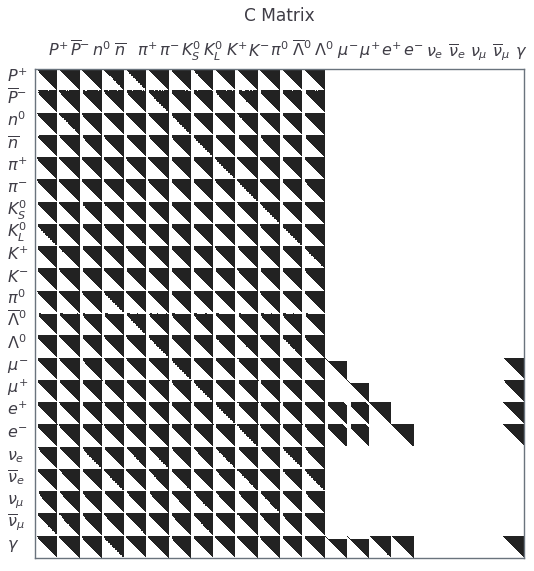

In [16]:
plt.figure(figsize=(9,9))
plt.title("C Matrix"+"\n"+"\n",fontsize=17)
plt.spy(C.toarray())
j=0
plt.xticks(ticks=[])
plt.yticks(ticks=[])

for i,p in enumerate(list_particles):
    
    plt.text(j+70,-70,Name[i],fontsize=16)
    plt.text(-150,j+70,Name[i],fontsize=16)
    j=j+121


In [17]:
D=decay_class(list_particles,list_particles_pdg_id).decay_matrix()


/home/kruteesh/Desktop/Solar_neutrinos/diffsec/diffrential_equation/decay_matrices.py:61: RuntimeWarning: divide by zero encountered in true_divide
  c = np.divide(a, b)
/home/kruteesh/Desktop/Solar_neutrinos/diffsec/diffrential_equation/decay_matrices.py:61: RuntimeWarning: invalid value encountered in true_divide
  c = np.divide(a, b)


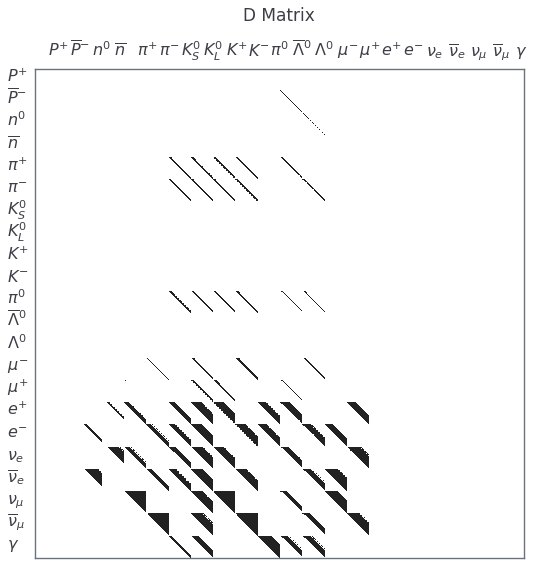

In [18]:
plt.figure(figsize=(9,9))
plt.title("D Matrix"+"\n"+"\n",fontsize=17)
plt.spy(D.toarray())
j=0
plt.xticks(ticks=[])
plt.yticks(ticks=[])

for i,p in enumerate(list_particles):
    
    plt.text(j+70,-70,Name[i],fontsize=16)
    plt.text(-150,j+70,Name[i],fontsize=16)
    j=j+121


In [16]:
L_dec=Lambdas.inverse_lengths(list_particles).inv_L_dec()

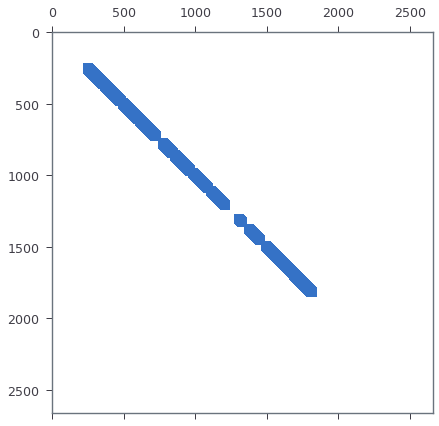

In [17]:
plt.spy(L_dec)

In [ ]:
L_inte=Lambdas.inverse_lengths(list_particles).inv_L_inte()#####change A for sun. !!!!!!

In [ ]:
mceq_run.pman[2212].inverse_interaction_length()

In [ ]:
print((L_inte[ind['p+','up']:ind['p+','low']][ind['p+','up']:ind['p+','low']]))


In [ ]:
import codecs
file = codecs.open('/home/kruteesh/Desktop/Solar_neutrinos/rho.txt', 'r', 'UTF-8')
print(file)
tline = file.readlines()
b=tline[5:]
r_ratio=[]
rho_data=[]
c=[]
for i in b:
    r_ratio.append(float(i.split(' ')[1]))

    rho_data.append(float(i.split(' ')[3]))

In [52]:
#radii.shape # (the rows have same h axis=0 => same h)!!!!!!!!!!!!!!!!!!
mceq_run.pman[321].name,mceq_run.pman[321].decay_dists.keys()

('K+',
 dict_keys([
         pi-:
         is_hadron     : True
         is_lepton     : False
         is_nucleus    : False
         is_stable     : False
         is_mixed      : True
         is_resonance  : False
         is_tracking   : False
         is_projectile : True
         mceqidx       : 17
         E_mix         : 7.1e-01 GeV
 , 
         mu+_l:
         is_hadron     : False
         is_lepton     : True
         is_nucleus    : False
         is_stable     : False
         is_mixed      : False
         is_resonance  : False
         is_tracking   : False
         is_projectile : False
         mceqidx       : 4
         E_mix         : 0.0e+00 GeV
 , 
         mu+_r:
         is_hadron     : False
         is_lepton     : True
         is_nucleus    : False
         is_stable     : False
         is_mixed      : False
         is_resonance  : False
         is_tracking   : False
         is_projectile : False
         mceqidx       : 6
         E_mix         : 0.0e+0

In [53]:
"""""
The primary fluxes
"""""
phi=np.zeros(len(list_particles)*121)
phi0_p = (
    mceq_run._phi0[mceq_run.pman[2212].lidx:mceq_run.pman[2212].uidx]
)
phi0_n=(
    mceq_run._phi0[mceq_run.pman[2112].lidx:mceq_run.pman[2112].uidx]
)
phi[242:363]=phi0_n
phi[0:121]=phi0_p


In [ ]:
phi0_mu=mceq_run.e_grid**(-2)
phi_test=np.zeros(len(list_particles)*121)
phi_test[ind["mu+","up"]:ind["mu+","low"]]=phi0_mu

In [ ]:
"""""
The RHS function for sol_ivp
"""""
def RHS_ivp( x,y ,c , d , inL_int , inL_dec , rh  ):
   # print(np.matmul((c-np.eye(c.shape[0])),inL_int).shape
    #         ,(np.matmul((d-np.eye(d.shape[0])), inL_dec)/rh(x )).shape,y.shape)
    rh= (
        ((c*rh(x)-eye(c.shape[0]))*inL_int)
                         +((d*rh(x)-eye(d.shape[0]))*inL_dec/rh(x))
        )*y
                
    return rh


In [ ]:
"The Sun and the X for the path from sun "
R_sun=6.957e10
h_list=[0,0.001]
new_h=np.array([h*R_sun for h in h_list])
print(new_h)

In [ ]:
#plt.figure(figsize=(11,11))
small_list=[
                #mceq_run.pman[(13,0)],
                mceq_run.pman[-13],
    #mceq_run.pman[11],
    mceq_run.pman[-11],
                #mceq_run.pman[211],       #numu        (21)
                #mceq_run.pman[130],
                #mceq_run.pman[321],
                #mceq_run.pman[(-13,0)],  #mu+          (14)
                #mceq_run.pman[211],      #pi+          (4)
               # mceq_run.pman[-211],     #pi-          (5)
               # mceq_run.pman[111], #pi0          (10)
                #mceq_run.pman[14],       #nue          (21)
                mceq_run.pman[-14],      #antinue       (22)
                #mceq_run.pman[12],       #numu         (23)
                mceq_run.pman[-12]      #antinumu      (24) 
    
]
ls=['r--','g--','k--','c--','b--','y--','r-.','g-.','k-.','c-.','b-.','y-.','r-','g-','b-','c-','k-'
    ,'y-','r.','g.','k.','y.','c.','b.']



In [ ]:
def RHS_test(x,y,c,d,inL_inte,inL_dec,rh):
    return (((c-eye(c.shape[0])*inL_dec))+((d-eye(d.shape[0]))*inL_dec))*y/rh(x)

In [ ]:
#final_phi
start_time=time.time()
sol_ivp_csr={}
x2rho={}
final_X={}#the dictionaries
for h in new_h:
    
    rhh=rho(R_sun,h,r_ratio,rho_data)
    x2rho[h]=rhh.X2rho()
    final_X[h]=rhh.final_X()
    #print(final_X[h],x2rho(int(len(final_X[h])/2)))
end_time=time.time()
#print(end_time-start_time)


In [ ]:
 for h in new_h:
    print(final_X[h],x2rho[h](int(len(final_X[h])/2)))


In [ ]:
sol_ivp_csr.keys()

In [ ]:
for h in new_h:
    start_time=time.time()
    sol_ivp_csr[h]=solve_ivp(
                            RHS_ivp,
                          [final_X[h][0],final_X[h][-1]],
                        phi,method='LSODA',args=(C,D,L_inte,L_dec,x2rho[h]))#vectorized=True,
    print(h)
    end_time=time.time()
    print(end_time-start_time)


In [ ]:
#plt.figure(figsize=(11,11))
for i,h in enumerate(h_list):
    plt.figure(figsize=(15,15))
    for j,p in enumerate(list_particles):
        
        bb_1=np.transpose(sol_ivp_csr[h*R_sun]['y'])
         
        #bb_2=np.transpose(sol_ivp_csr[h_list[i+1]*R_sun]['y'])
        #phi_ratio=bb_1[-1][ind[p.name,'up']:ind[p.name,'low']]/ bb_2[-1][ind[p.name,'up']:ind[p.name,'low']]
        r=(bb_1[-1][ind[p.name,'up']:ind[p.name,'low']])           
        if np.any(r)!=0:
         #   print(p.name)
            plt.scatter(mceq_run.e_grid,
                 (mceq_run.e_grid**3)*np.nan_to_num(bb_1[-1][ind[p.name,'up']:ind[p.name,'low']]
                                                 ),label=p.name)
        else:
            print(p.name)
    plt.plot(mceq_run.e_grid,(mceq_run.e_grid**3)*phi[ind["p+","up"]:ind["p+","low"]],"r-",label="p+ initial ")
    plt.plot(mceq_run.e_grid,(mceq_run.e_grid**3)*phi[ind["n0","up"]:ind["n0","low"]],"b-",label="n0 initial ")

    plt.title(" max X="+str("{:e}".format(final_X[h*R_sun][-1])),fontsize=18)
    plt.xlabel("E (GeV)",fontsize=18)
    plt.ylabel(r'$E^{3} \frac{d\Phi}{dE}$',fontsize=18)
    #plt.ylim((1e-85,1e3))
    #plt.xlim((1e1,1e7))
    plt.legend()
    plt.grid()
    plt.xscale("log")
    plt.yscale("log")
    #    plt.savefig('/home/kruteesh/Desktop/Solar_neutrinos/diffsec/pics/'+str(h_list[i])+'.png')

In [ ]:
s='p+'
plt.figure(figsize=(15,15))
#for j,s in enumerate(np.array([i.name for i in small_list])):
bb=np.transpose(sol_ivp_csr[new_h[4]]['y'])[-1][ind[s,'up']:ind[s,'low']]
print(bb)
plt.scatter(mceq_run.e_grid,(mceq_run.e_grid**2)*bb,label=s+' flux')

plt.plot(mceq_run.e_grid,phi[ind[s,'up']:ind[s,'low']]*mceq_run.e_grid**2,'g--',label="p+ initial ")
plt.xlabel("E (GeV)")
plt.ylabel(r'$E^{2} \frac{d\Phi}{dE}$')
plt.title('X_max='+str(final_X[new_h[3]][-1]))
plt.ylim((1e-75,1e1))
plt.legend()
plt.grid()
plt.xscale("log")
plt.yscale("log")

In [ ]:
for i,h in enumerate(new_h):
    plt.figure(figsize=(11,11))
    for j,p in enumerate(small_list):
        
        bb_1=np.transpose(sol_ivp_csr[new_h[i]]['y'])
        bb_2=np.transpose(sol_ivp_csr[new_h[i+1]]['y'])
        phi_ratio=bb_1[-1][ind[p.name,'up']:ind[p.name,'low']]/ bb_2[-1][ind[p.name,'up']:ind[p.name,'low']]
        plt.plot(mceq_run.e_grid,
                (phi_ratio),
                 ls[j],label=p.name)
    #plt.plot(mceq_run.e_grid,(mceq_run.e_grid**3)*phi[0:121],label="P+ initial ")

    plt.title(r"$\Phi$ ratio  for h="+str(h_list[i])+"*R_sun "+", h="+str(h_list[i+1])+"*R_sun ")
    plt.xlabel("E (GeV)")
    plt.ylabel(r'$\Phi$ ratio (small h / large h)')
    #plt.xlim((1e10,1e11))
    plt.legend()
    plt.grid()
    plt.xscale("log")
    #plt.yscale("log")
    plt.savefig('/home/kruteesh/Desktop/Solar_neutrinos/diffsec/pics/'+str(h_list[i])+','+str(h_list[i+1])+'.png')

In [ ]:
#For neutrino oscillation
#for atmospheric neutrinos


In [ ]:
p_mu=1-sin^2(2*theta_13)*sin^2(theta_23)+sin^2(2*theta_23)cos^4(theta_13)*sin(dm^2_atm *L/4E)

In [ ]:
p_e=1-sin^2(2*theta_12)*cos^2(theta_13)*sin^2(dm^2_12 *L/4E)=1-(p_emu+p_e_t)
p_mu=1-(p_mue+p_mut)